In [ ]:
! python -m pip install pandas

In [ ]:
! python -m pip install scipy

## Series de Pandas

Una serie es un objeto que almacena valores y permite aplicar operaciones matemáticas de agregación (acumulación) o de linealidad con otras series o escalares.

Podemos pensar en una serie de datos como las observaciones de valores similares a los que les aplicamos funciones y estadística en grupo.

Definición de una serie

In [ ]:
import pandas

edades = pandas.Series([23, 45, 65, 12, 47, 32])

edades

0    23
1    45
2    65
3    12
4    47
5    32
dtype: int64


### Estadística sobre series

In [5]:
edades.describe()

count     6.000000
mean     37.333333
std      18.938497
min      12.000000
25%      25.250000
50%      38.500000
75%      46.500000
max      65.000000
dtype: float64

In [6]:
(37.333 - 18.93, 37.333 + 18.93)

(18.403, 56.263)

In [7]:
(37.333 - 2 * 18.93, 37.333 + 2 * 18.93)

(-0.527000000000001, 75.193)

> Ejemplo: Producción de tornillos

Una fábrica produce cabezas de tornillos y quiere determinar el intervalo que capture al 99% de las medidas de tornillos posibles, suponiendo que tienen una distribución normal.

Para visualizar si los datos se distribuyen normalmente se requiere validarlo visualmente con un histograma. Si el comportamiento parece centrado en la media y la distribución de los datos parece formar una campana, el supuesto de normalidad y distribución estándar tendrán sentido.

In [8]:
import pandas

tornillos = pandas.Series([
    1.00, 1.05, 1.01, 0.98, 0.99,
    1.08, 1.02, 1.04, 0.97, 0.93,
    1.04, 1.01, 1.07, 0.91, 0.97,
])

tornillos

0     1.00
1     1.05
2     1.01
3     0.98
4     0.99
5     1.08
6     1.02
7     1.04
8     0.97
9     0.93
10    1.04
11    1.01
12    1.07
13    0.91
14    0.97
dtype: float64

In [9]:
tornillos.describe()

count    15.000000
mean      1.004667
std       0.048236
min       0.910000
25%       0.975000
50%       1.010000
75%       1.040000
max       1.080000
dtype: float64

In [12]:
(1.004667 - 2.33 * 0.048236, 1.004667 + 2.33 * 0.048236)

(0.8922771199999999, 1.11705688)

<Axes: ylabel='Frequency'>

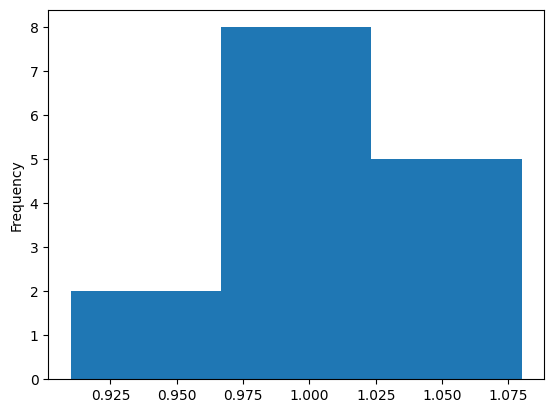

In [23]:
tornillos.plot.hist(bins=3)

<Axes: ylabel='Density'>

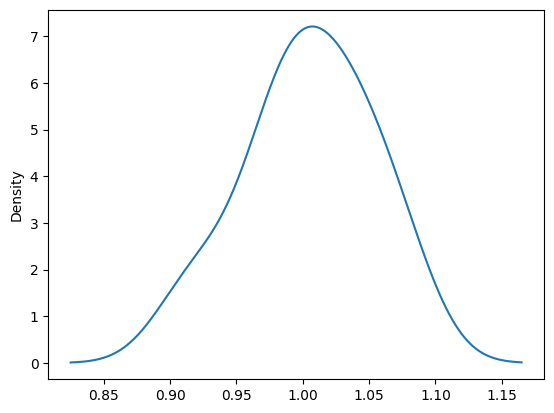

In [17]:
tornillos.plot.density()

> Ejemplo: Tiempos de llegada del metrobus

En una estación del metrobus se observan los tiempos entre uno y otro, para determinar cómo es su comportamiento.

In [24]:
import pandas

tiempos = pandas.Series([
    30, 50, 28, 62, 39, 78,
    25, 58, 26, 72, 31, 65,
    28, 63, 24, 54, 29, 84,
    32, 57, 39, 61, 23, 54,
    37, 65, 32, 63, 17, 49,
])

tiempos

0     30
1     50
2     28
3     62
4     39
5     78
6     25
7     58
8     26
9     72
10    31
11    65
12    28
13    63
14    24
15    54
16    29
17    84
18    32
19    57
20    39
21    61
22    23
23    54
24    37
25    65
26    32
27    63
28    17
29    49
dtype: int64

<Axes: ylabel='Frequency'>

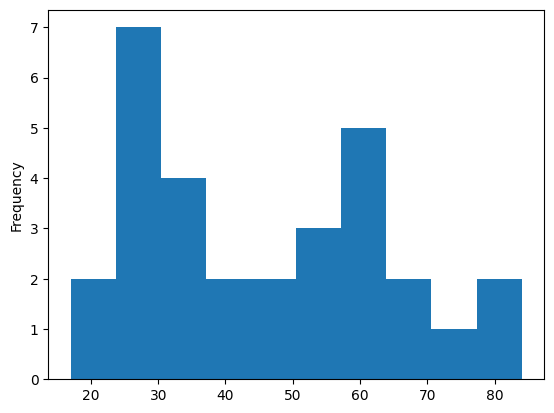

In [29]:
tiempos.plot.hist()

<Axes: ylabel='Density'>

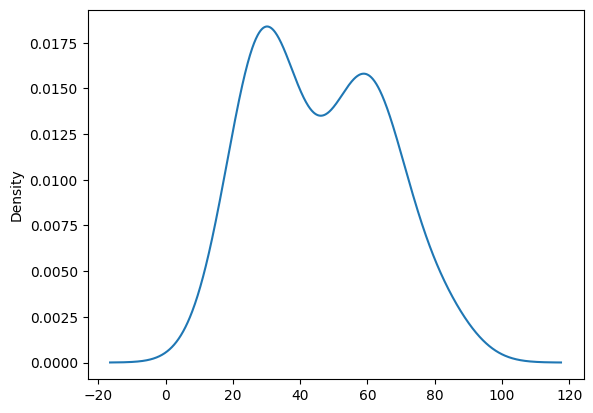

In [30]:
tiempos.plot.density()

### Análisis por cuantiles (*quantiles*)

El cuantil representa el valor a una progresión de los datos ordenados desde el mínimo, hasta el máximo.

Por ejemplo, si ordenamos los datos de menor a mayor, el que esté cerca del 25% de la progresión será el cuartil 1 o quantil 25%.

Generalmente se dividen los cuantiles en:

* Percentiles (sobre 100 cada 1%)
* Deciles (sobre 10 cada 10%)
* Quintiles (sobre 5 cada 20%)
* Cuartiles (sobre 4 cada 25%)

Con esto, la progresión nos dirá quién es el valor bajo entre los picos que se formen sobre la distribución.

In [35]:
s1 = tiempos.sort_values()
s1

28    17
22    23
14    24
6     25
8     26
2     28
12    28
16    29
0     30
10    31
26    32
18    32
24    37
4     39
20    39
29    49
1     50
23    54
15    54
19    57
7     58
21    61
3     62
13    63
27    63
25    65
11    65
9     72
5     78
17    84
dtype: int64

In [38]:
s1.count()

30

In [42]:
s1.index = 100 * (pandas.Series(range(s1.count())) + 1) / s1.count()

s1

3.333333      17
6.666667      23
10.000000     24
13.333333     25
16.666667     26
20.000000     28
23.333333     28
26.666667     29
30.000000     30
33.333333     31
36.666667     32
40.000000     32
43.333333     37
46.666667     39
50.000000     39
53.333333     49
56.666667     50
60.000000     54
63.333333     54
66.666667     57
70.000000     58
73.333333     61
76.666667     62
80.000000     63
83.333333     63
86.666667     65
90.000000     65
93.333333     72
96.666667     78
100.000000    84
dtype: int64

In [ ]:
! python -m pip install seaborn

<Axes: xlabel='None', ylabel='None'>

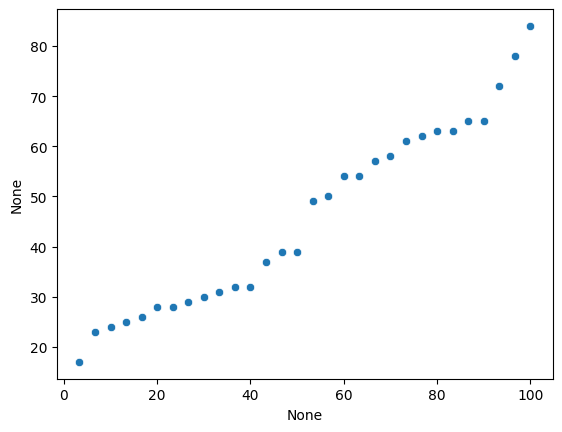

In [45]:
import seaborn

seaborn.scatterplot(x=s1.index, y=s1)

<Axes: xlabel='None', ylabel='None'>

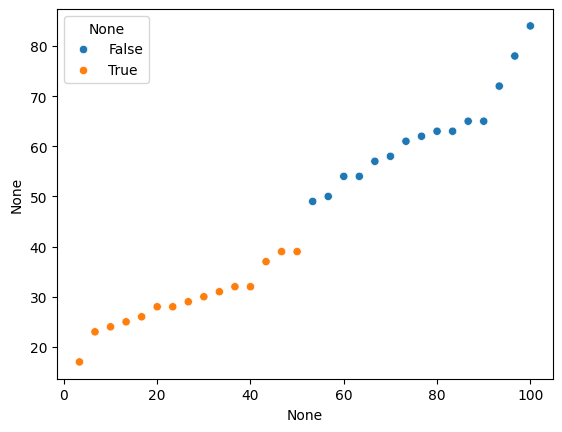

In [46]:
seaborn.scatterplot(x=s1.index, y=s1, hue=s1 <= 40)

### Operaciones con series

Las series pueden ser vistas como ejes de datos por lo que se pueden reducir y combinar.

Existen métodos de reducción de la serie a un solo valor, a estos métodos se les conoce como métodos de agregación:

* `<serie>.count()` - Devuelve el número de elementos en la serie
* `<serie>.mean()` - Devuelve el promedio de los valores en la serie
* `<serie>.std()` - Devuelve la desviación estándar de la serie
* `<serie>.min()` - Duevuelve el valor mínimo de la serie
* `<serie>.max()` - Duevuelve el valor máximo de la serie
* `<serie>.quantile(.25)` - Duevuelve el cuartil 1 de la serie
* `<serie>.quantile(.5)` - Duevuelve el cuartil 2 de la serie
* `<serie>.quantile(.75)` - Duevuelve el cuartil 2 de la serie
* `<serie>.quantile(.20)` - Duevuelve el quintil 1 de la serie
* `<serie>.quantile(.70)` - Duevuelve el decil 7 o percentil 70 de la serie
* `<serie>.var()` - Devuelve la varianza de la serie

A los métodos que operan series y escalares se les conoce como métodos de combinación:

* `<serie 1> + <serie 2>` - Devuelve una nueva serie con la suma de cada elemento (las series deben ser del mismo tamaño)
* `<serie 1> - <serie 2>` - Devuelve una nueva serie con la resta de cada elemento (las series deben ser del mismo tamaño)
* `<serie 1> * <serie 2>` - Devuelve una nueva serie con la multiplicación de cada elemento (las series deben ser del mismo tamaño)
* `<serie 1> / <serie 2>` - Devuelve una nueva serie con la división de cada elemento (las series deben ser del mismo tamaño)
* `<serie 1> + <escalar>` - Devuelve una nueva serie con la suma del escalar para cada elemento
* `<serie 1> - <escalar>` - Devuelve una nueva serie con la resta del escalar para cada elemento
* `<serie 1> * <escalar>` - Devuelve una nueva serie con la multiplicación del escalar para cada elemento
* `<serie 1> / <escalar>` - Devuelve una nueva serie con la división del escalar para cada elemento

Definir una lista de precios

In [47]:
precios = pandas.Series([45, 23, 17, 89, 35, 22])

precios

0    45
1    23
2    17
3    89
4    35
5    22
dtype: int64

Métodos de agregación

In [48]:
precios.count()

6

In [49]:
precios.mean()

38.5

In [50]:
precios.std()

26.75630766753888

In [51]:
precios.min()

17

In [52]:
precios.max()

89

In [53]:
precios.quantile(0.25)

22.25

In [54]:
precios.quantile(0.5)

29.0

In [55]:
precios.quantile(0.75)

42.5

In [ ]:
precios.quantile(0.78) # Cuantil 78%

44.0

In [57]:
precios.var()

715.9

Métodos de combinación

In [59]:
descuentos = pandas.Series([0, 2.5, 4.5, 0, 7.8, 0])

descuentos

0    0.0
1    2.5
2    4.5
3    0.0
4    7.8
5    0.0
dtype: float64

In [60]:
precios - descuentos

0    45.0
1    20.5
2    12.5
3    89.0
4    27.2
5    22.0
dtype: float64

In [61]:
comisiones = pandas.Series([0, 4, 2, 0, 3, 0])

precios + comisiones

0    45
1    27
2    19
3    89
4    38
5    22
dtype: int64

In [62]:
precios + comisiones - descuentos

0    45.0
1    24.5
2    14.5
3    89.0
4    30.2
5    22.0
dtype: float64

In [63]:
impuestos = pandas.Series([1.16, 1 + 0.16 - 0.1066666, 1.08, 1.14, 1.13, 1])

precios * impuestos

0     52.200000
1     24.226668
2     18.360000
3    101.460000
4     39.550000
5     22.000000
dtype: float64

In [64]:
precios + 100

0    145
1    123
2    117
3    189
4    135
5    122
dtype: int64

In [65]:
precios - 10

0    35
1    13
2     7
3    79
4    25
5    12
dtype: int64

In [66]:
precios * 1.16

0     52.20
1     26.68
2     19.72
3    103.24
4     40.60
5     25.52
dtype: float64

In [67]:
precios / 1.16

0    38.793103
1    19.827586
2    14.655172
3    76.724138
4    30.172414
5    18.965517
dtype: float64

> Ejemplo: Correlación entre el precio del gas y el precio del dólar

Se tienen dos series de datos con el precio del gas y el dólar observados durante 7 días.

Grafica el comportamiento entre ambos y explícalo.

In [71]:
precios_gas = pandas.Series([
    13.45, 14.67, 13.98, 15.29, 11.23, 12.56, 12.38
])

precios_dolar = pandas.Series([
    19.19, 19.30, 18.95, 19.56, 18.67, 19.23, 19.17
])

<Axes: xlabel='None', ylabel='None'>

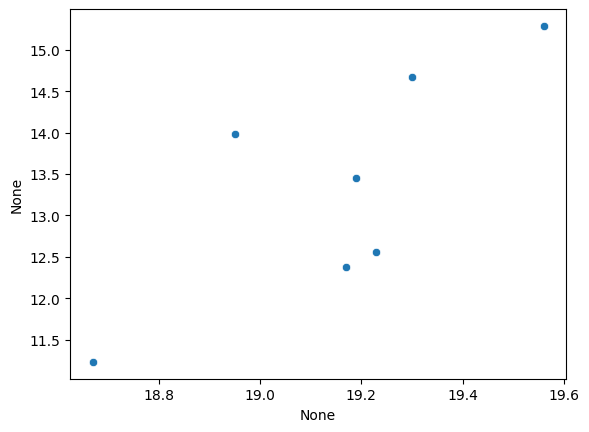

In [73]:
import seaborn

seaborn.scatterplot(x=precios_dolar, y=precios_gas)

<Axes: xlabel='None', ylabel='None'>

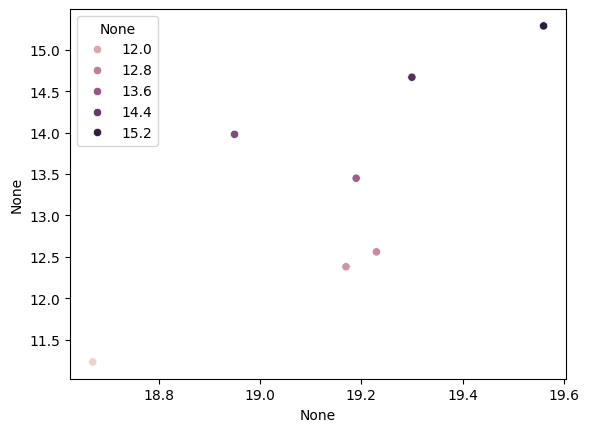

In [74]:
seaborn.scatterplot(x=precios_dolar, y=precios_gas, hue=precios_gas)

<Axes: >

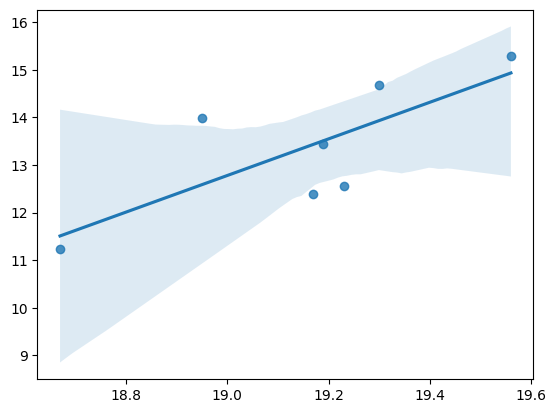

In [75]:
seaborn.regplot(x=precios_dolar, y=precios_gas)